# Tutorial Python

Limpar memória do Python

In [1]:
%reset -f

## Carregar pacotes necessário 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

## Carregue o banco de dados

Aqui usaremos o conjunto de dados publicado por Biagolini-Jr. et al 2021 https://doi.org/10.1007/s00265-021-03015-2. Esse conjunto de dados consiste em dados de filmagem de display de Tiziu registradas em Brasília/DF, coletadas em duas áreas.

Para importar uma planilha no padrão xlsx (excel), use o comando:

In [3]:
dados = pd.read_excel('Dados_Biagolini-Jr_et_al_2021.xlsx')

Confira o conjunto de dados importado

In [4]:
dados.dtypes

DisplayId                    object
Location                     object
nLeaps                        int64
LeapDuration                float64
LeapRate                    float64
Nseeds                      float64
ShadowIntensity             float64
VegetationDensity           float64
Disturbance                   int64
Truck                         int64
Fire                          int64
Mower                         int64
LocationID                   object
BorderDistance              float64
RoadDistance                float64
LakeDistance                float64
DawnTime                    float64
DayYear                       int64
Nest20                       object
Nest10                       object
RecordTime                   object
RecordDate           datetime64[ns]
BreedingSeason               object
Longitude                   float64
Latitude                    float64
dtype: object

In [5]:
dados.head()

,DisplayId,Location,nLeaps,LeapDuration,LeapRate,Nseeds,ShadowIntensity,VegetationDensity,Disturbance,Truck,...,LakeDistance,DawnTime,DayYear,Nest20,Nest10,RecordTime,RecordDate,BreedingSeason,Longitude,Latitude
0,D01,ar,18,683.777778,14.826012,2329.680000,2.179201,0.211558,0,0,...,576.506757,0.9411,30,No,No,06:36:00,2018-01-31,2017_2018,-47.872075,-15.755073
1,D02,ar,17,440.176471,16.131743,506.400000,0.407589,0.184022,0,0,...,631.899508,1.5911,30,No,No,07:15:00,2018-01-31,2017_2018,-47.872535,-15.755306
2,D03,ar,16,372.375000,17.113520,435.600000,1.352319,0.092675,0,0,...,568.246695,2.3411,30,No,No,08:00:00,2018-01-31,2017_2018,-47.872656,-15.754348
3,D04,co,18,510.111111,19.144863,950.733333,1.612304,0.268500,0,0,...,246.435504,1.3769,18,No,No,06:55:00,2018-01-19,2017_2018,-47.856289,-15.761616
4,D05,co,14,432.000000,15.084536,842.940000,0.504573,0.301722,0,0,...,231.269427,1.5103,18,No,No,07:03:00,2018-01-19,2017_2018,-47.856148,-15.761477


Vamos criar uma novaa coluna para definir a localizacao, onde dados de ar=0 e co=1

In [6]:
dados['LocationCO'] = dados['Location'].map({'ar': 0, 'co': 1})

Descrição das variáveis contidas no data frame

In [7]:
dados.describe()

,nLeaps,LeapDuration,LeapRate,Nseeds,ShadowIntensity,VegetationDensity,Disturbance,Truck,Fire,Mower,BorderDistance,RoadDistance,LakeDistance,DawnTime,DayYear,Longitude,Latitude,LocationCO
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,19.672727,461.256360,13.943437,561.499081,1.660802,0.295612,0.290909,0.018182,0.254545,0.363636,81.830139,188.655060,489.512082,2.420751,55.236364,-47.868266,-15.756524,0.290909
std,8.062383,80.333536,3.021673,571.315086,1.088961,0.120567,0.458368,0.134840,0.439620,0.485479,45.270197,141.253561,232.493929,1.216424,16.581967,0.008003,0.003355,0.458368
min,11.000000,307.894737,7.073883,0.000000,0.114888,0.082206,0.000000,0.000000,0.000000,0.000000,0.719979,10.642966,11.245272,0.605300,18.000000,-47.874982,-15.764221,0.000000
25%,15.000000,407.220450,11.944027,195.250000,0.732770,0.209323,0.000000,0.000000,0.000000,0.000000,48.870137,98.581043,231.139188,1.580250,58.000000,-47.873571,-15.760361,0.000000
50%,18.000000,450.905660,13.745334,375.240000,1.553215,0.289169,0.000000,0.000000,0.000000,0.000000,87.676287,131.556726,585.597465,1.975600,60.000000,-47.872871,-15.755025,0.000000
75%,22.000000,513.046569,15.848704,684.160000,2.356183,0.381701,1.000000,0.000000,0.500000,1.000000,115.490971,342.643765,644.346039,2.872200,63.500000,-47.857477,-15.754293,1.000000
max,53.000000,705.125000,20.910022,2550.860000,4.781968,0.604560,1.000000,1.000000,1.000000,1.000000,160.362508,476.253447,779.728855,5.643300,78.000000,-47.852807,-15.752316,1.000000


Caso precise consultar o nome das variáveis presentes no conjunto de dados

In [8]:
print(list(dados))

['DisplayId', 'Location', 'nLeaps', 'LeapDuration', 'LeapRate', 'Nseeds', 'ShadowIntensity', 'VegetationDensity', 'Disturbance', 'Truck', 'Fire', 'Mower', 'LocationID', 'BorderDistance', 'RoadDistance', 'LakeDistance', 'DawnTime', 'DayYear', 'Nest20', 'Nest10', 'RecordTime', 'RecordDate', 'BreedingSeason', 'Longitude', 'Latitude', 'LocationCO']


## Regressão multipla com 2 variáveis preditoras: 1 quantitativa 1 qualitativa

### Modelo 1 BorderDistance ~ RoadDistance + LocationCO

#### Regressão linear simples

Para fins didáticos, vamos primeiro construir um modelo sem considerar a variável categorica que separa os dados em grupos

In [9]:
# Regressão linear simples
y_RLS = dados ['BorderDistance'] 
x_RLS = dados ['RoadDistance']

x_RLS = sm.add_constant(x_RLS)
modelo1_RLS = sm.OLS(y_RLS,x_RLS).fit()
modelo1_RLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         BorderDistance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                  0.004279
Date:                Fri, 27 Aug 2021   Prob (F-statistic):              0.948
Time:                        16:12:05   Log-Likelihood:                -287.23
No. Observations:                  55   AIC:                             578.5
Df Residuals:                      53   BIC:                             582.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           82.3734     10.341      7.966      0.000      61.633     103.114
RoadDistance    -0.0029      0.044     -0.065      0.948      -0.091       0.085
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                2.865
Skew:                          -0.322   Prob(JB):                        0.239
Kurtosis:                       2.086   Cond. No.                         394.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Vamos fazer um plot desses resultados (OBS: note que o p não é significativo)

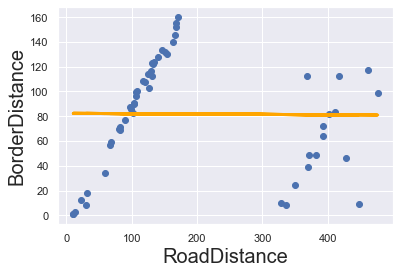

In [10]:
plt.scatter(dados['RoadDistance'],dados['BorderDistance'])
# Regressão  
yhat = 82.3734 -0.0029*dados['RoadDistance']

# Plot the two regression lines
fig = plt.plot(dados['RoadDistance'],yhat, lw=3, c='orange', label ='regression line')

plt.xlabel('RoadDistance', fontsize = 20)
plt.ylabel('BorderDistance', fontsize = 20)
plt.show()

#### Regressão linear multipla 

Defina as variáveis que vão entrar no seu modelo

In [11]:
y = dados ['BorderDistance'] 
x1 = dados [['RoadDistance','LocationCO']]

Adicione a constante 1

In [12]:
x = sm.add_constant(x1)

Ajuste um modelo

In [13]:
modelo1 = sm.OLS(y,x).fit()

In [14]:
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         BorderDistance   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     108.9
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           2.56e-19
Time:                        16:12:05   Log-Likelihood:                -241.96
No. Observations:                  55   AIC:                             489.9
Df Residuals:                      52   BIC:                             495.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.1406      7.111      0.301      0.765     -12.128      16.410
RoadDistance     0.8503      0.061     13.935      0.000       0.728       0.973
LocationCO    -277.4929     18.804    -14.757      0.000    -315.225    -239.761
==============================================================================
Omnibus:                       35.852   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.071
Skew:                          -1.227   Prob(JB):                     1.72e-68
Kurtosis:                      14.409   Cond. No.                     1.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OBS: o valor de p para disturbio não deu significativo. Isso quer dizer que não importa se houve ou não disturbio, essa relação é a mesma. Mas se o valor de p fosse menor que 0.05, poderiamos avaliar o efeito do disturbiu em cada situação fazendo:

Veja a relação que seria esperada em uma regressão

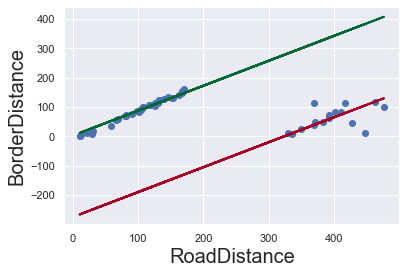

In [15]:
plt.scatter(dados['RoadDistance'],y) # Criar o plot
# Definir duas retas de regressão dependendo do grupo (no=pontos do AR; yes=pontos do CO)
yhat_no = 2.1406 + 0.8503*dados['RoadDistance'] # 2.1406 = const coef
yhat_yes = -275.3523 + 0.8503*dados['RoadDistance'] # -275.3523 = const coef + coef da categorica (LocationCO)= 2.1406-277.4929 
# Desenhar as duas retas de regressão
fig = plt.plot(dados['RoadDistance'],yhat_no, lw=2, c='#006837')
fig = plt.plot(dados['RoadDistance'],yhat_yes, lw=2, c='#a50026')
# Name your axes :)
plt.xlabel('RoadDistance', fontsize = 20)
plt.ylabel('BorderDistance', fontsize = 20)
plt.show()

Agora, vamos difrenciar os pontos, com as cores de cada grupo

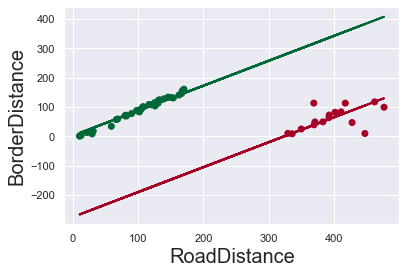

In [16]:
plt.scatter(dados['RoadDistance'],dados['BorderDistance'], c=dados['LocationCO'],cmap='RdYlGn_r')
fig = plt.plot(dados['RoadDistance'],yhat_no, lw=2, c='#006837')
fig = plt.plot(dados['RoadDistance'],yhat_yes, lw=2, c='#a50026')
plt.xlabel('RoadDistance', fontsize = 20)
plt.ylabel('BorderDistance', fontsize = 20)
plt.show()

Agora ára fins didaticos, vamos inserir a reta da regressão linear que seria esperada quando não fosse considerado o grupo dos dados

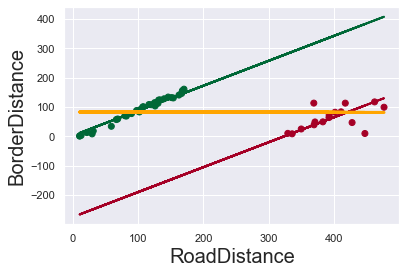

In [17]:
plt.scatter(dados['RoadDistance'],dados['BorderDistance'], c=dados['LocationCO'],cmap='RdYlGn_r')# Criar o plot
# Definir duas retas de regressão dependendo do grupo (no=pontos do AR; yes=pontos do CO)
yhat_no = 2.1406 + 0.8503*dados['RoadDistance'] # 2.1406 = const coef
yhat_yes = -275.3523 + 0.8503*dados['RoadDistance'] # -275.3523 = const coef + coef da categorica (LocationCO)= 2.1406-277.4929 
# regressão original 
yhat = 82.3734 -0.0029*dados['RoadDistance']

# Desenhar as retas de regressão
fig = plt.plot(dados['RoadDistance'],yhat_no, lw=2, c='#006837')
fig = plt.plot(dados['RoadDistance'],yhat_yes, lw=2, c='#a50026')
fig = plt.plot(dados['RoadDistance'],yhat, lw=3, c='orange', label ='regression line')

# Name your axes :)
plt.xlabel('RoadDistance', fontsize = 20)
plt.ylabel('BorderDistance', fontsize = 20)
plt.show()

## Regressão multipla com 2 variáveis preditoras: 2 quantitativas

### Modelo 2 LeapDuration ~ Nseeds + ShadowIntensity

Para esse exemplo, vamos repetir uma análise feita no artigo de referência. 
É importante informar que no artigo original, foi proposto um modelo mais complexo, que depois de passar por uma seleção de modelos (aplicando backward stepwise model selection), foi simplificado até chegar no modelo mínimo adequado (minimal adequate model - MAM). Além disso, nessa analise foi utilizado apenas dados de observações que não eram potencialmente afetadas por distúrbios antrópicos (evento de fogo no habitat alguns meses antes da filmagem dos displays).
Como o objetivo desse tutorial é ensinar regressão múltipla, não irie mostrar como proceder com a seleção de modelos. Portanto, vamos direto construir o mesmo modelo que foi apresentado no artigo, que é:

$LeapDuration =  \beta_0 + \beta_1 * Nseeds +  \beta_2 * ShadowIntensity$

#### Seleção de dados não afetados por disturbios antrópicos

In [18]:
nonPAD = dados[dados["Disturbance"] == 0]

#### Padronização dos dados (Standardization)

Selecione os dados para análise

In [19]:
DadosBrutos = nonPAD [['LeapDuration','Nseeds','ShadowIntensity']]

Aplique a padronização nos seus dados

In [20]:
from sklearn.preprocessing import StandardScaler # Importar pacote
scaler = StandardScaler() # Renomear função
scaler.fit(DadosBrutos) # Escale o conjunto de dados x
DadosPadronizados = scaler.transform(DadosBrutos) # Fazer a padronização dos dados
DadosPadronizados = pd.DataFrame(DadosPadronizados, columns = ['LeapDuration','Nseeds','ShadowIntensity'])
DadosPadronizados # Observe os dados

,LeapDuration,Nseeds,ShadowIntensity
0,3.189795,4.235073,0.379966
1,-0.346569,0.020020,-1.259048
2,-1.330843,-0.143655,-0.385027
3,0.668674,1.047228,-0.144501
4,-0.465267,0.798032,-1.169323
5,0.764720,-0.101904,0.089649
6,-0.315678,0.236450,1.024934
7,-0.172507,0.866461,0.673150
8,0.452605,-0.726321,-0.162585
9,0.245407,-0.304972,0.089672


Gerar uma figura 3D dos dados que serão usados neste modelo

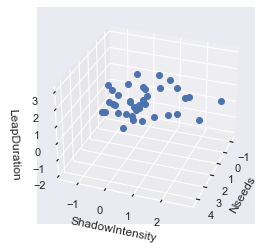

In [21]:
# Declarar a figura
fig = plt.figure()

# Aplicar o método que permite criar uma figura 3D
ax = fig.add_subplot(111, projection='3d')

# Definição dos eixos
ax.plot(DadosPadronizados['Nseeds'],DadosPadronizados['ShadowIntensity'], DadosPadronizados['LeapDuration'],linestyle="",marker="o")

# Colocar uma etiqueta (label) nos eixos
ax.set_xlabel('Nseeds')
ax.set_ylabel('ShadowIntensity')
ax.set_zlabel('LeapDuration')

# Definir o angulo do qual vamos ver nosso gráfico 3D. 
# Você pode rotacionar o eixo trocando o parametro azim para outros valores (experimente 0; 90; 200;...),
ax.view_init(azim=20)

# Mostrar o plot 
plt.show()

Selecione as variáveis para trabalhar

In [22]:
y = DadosPadronizados ['LeapDuration'] # Duração do salto (quantos milisegundos leva do momento que o Tiziu tira a pata do poleiro até colocar a pata novamente no poleiro)
x = DadosPadronizados [['Nseeds','ShadowIntensity']] # Nseeds = Número médio de semenstes em plotes de 50cm2; ShadowIntensity = Intensidade de sombreamento
# x2= nonPAD ['ShadowIntensity']

In [23]:
reg = LinearRegression() # Fazer a regressão
reg.fit(x,y) 

LinearRegression()

Summary table

In [24]:
reg_summary = pd.DataFrame([['Bias'],['Nseeds'],['ShadowIntensity']], columns=['Features'])
reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1]
reg_summary

,Features,Weights
0,Bias,-2.719114e-16
1,Nseeds,4.657175e-01
2,ShadowIntensity,3.407928e-01


Ou de forma direta

In [25]:
resultado = sm.OLS(y,x).fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           LeapDuration   R-squared (uncentered):                   0.360
Model:                            OLS   Adj. R-squared (uncentered):              0.326
Method:                 Least Squares   F-statistic:                              10.43
Date:                Fri, 27 Aug 2021   Prob (F-statistic):                    0.000256
Time:                        16:12:06   Log-Likelihood:                         -46.623
No. Observations:                  39   AIC:                                      97.25
Df Residuals:                      37   BIC:                                      100.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Nseeds              0.4657      0.132      3.529      0.001       0.198       0.733
ShadowIntensity     0.3408      0.132      2.582      0.014       0.073       0.608
==============================================================================
Omnibus:                        0.753   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.686   Jarque-Bera (JB):                0.840
Skew:                           0.248   Prob(JB):                        0.657
Kurtosis:                       2.479   Cond. No.                         1.09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Extra 1

Como extrair um histograma dos residuos do modelo

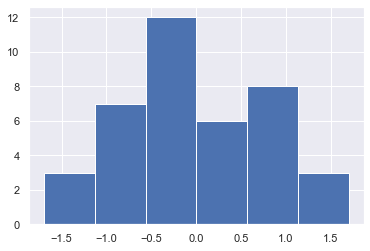

In [26]:
plt.hist(resultado.resid,6)
plt.show()

#### Extra 2

No meu artigo eu optei por padronizar todos os dados, até o da variável preditora. Isso porque a variável LeapDuration não apresentava distribuição normal, mas quando padronizava o resultado parecia normal. Esse é um ponto de discussão quanto a análise estatística. Alguns autores dizem que você só precisa padronizar as variáveis preditoras, mas não a resposta, outros dizem que você pode padronizar tudo. A seguir, vou mostrar como seria para fazer a mesma analise padronizando apenas as variáveis preditoras. 

###### Regressão com apenas as variáveis preditoras padronizadas

In [27]:
x = nonPAD [['Nseeds','ShadowIntensity']]
y = nonPAD ['LeapDuration']

In [28]:
from sklearn.preprocessing import StandardScaler # Importar pacote
scaler = StandardScaler() # Renomear função
scaler.fit(x) # Escale o conjunto de dados x
x_scaled = scaler.transform(x) # Fazer a padronização dos dados
DadosParaAnalise = pd.DataFrame(np.column_stack((y,x_scaled)), columns = ['LeapDuration','Nseeds','ShadowIntensity'])
DadosParaAnalise # Observe os dados

,LeapDuration,Nseeds,ShadowIntensity
0,683.777778,4.235073,0.379966
1,440.176471,0.020020,-1.259048
2,372.375000,-0.143655,-0.385027
3,510.111111,1.047228,-0.144501
4,432.000000,0.798032,-1.169323
5,516.727273,-0.101904,0.089649
6,442.304348,0.236450,1.024934
7,452.166667,0.866461,0.673150
8,495.227273,-0.726321,-0.162585
9,480.954545,-0.304972,0.089672


In [29]:
y = DadosParaAnalise ['LeapDuration'] # Duração do salto (quantos milisegundos leva do momento que o Tiziu tira a pata do poleiro até colocar a pata novamente no poleiro)
x = DadosParaAnalise [['Nseeds','ShadowIntensity']] # Nseeds = Número médio de semenstes em plotes de 50cm2; ShadowIntensity = Intensidade de sombreamento
# x2= nonPAD ['ShadowIntensity']

In [30]:
resultado = sm.OLS(y,x).fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           LeapDuration   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):             -0.046
Method:                 Least Squares   F-statistic:                             0.1449
Date:                Fri, 27 Aug 2021   Prob (F-statistic):                       0.866
Time:                        16:12:06   Log-Likelihood:                         -295.07
No. Observations:                  39   AIC:                                      594.1
Df Residuals:                      37   BIC:                                      597.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Nseeds             32.0808     77.113      0.416      0.680    -124.165     188.326
ShadowIntensity    23.4754     77.113      0.304      0.763    -132.770     179.721
==============================================================================
Omnibus:                        0.753   Durbin-Watson:                   0.024
Prob(Omnibus):                  0.686   Jarque-Bera (JB):                0.840
Skew:                           0.248   Prob(JB):                        0.657
Kurtosis:                       2.479   Cond. No.                         1.09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""